In [ ]:
import requests, pandas as pd, time

In [ ]:
ticker = 'bitcoin'
currency = 'usd'
api_key = 'CG-SDDjfG9yYk9mhvHjWhcQupfA'

url = f'https://api.coingecko.com/api/v3/coins/{ticker}/market_chart'
params = {'vs_currency': currency, 'days': '365'}
headers = {'x-cg-demo-api-key': api_key}

response = requests.get(url, headers=headers, params=params)
data = response.json()

In [ ]:
print(response.status_code)
print(response.json())

200
{'prices': [[1730764800000, 67793.29782704762], [1730851200000, 69335.42553133758], [1730937600000, 75620.88606963192], [1731024000000, 75987.24178320667], [1731110400000, 76550.0213845611], [1731196800000, 76630.22631415377], [1731283200000, 80466.71654833542], [1731369600000, 88637.42000322911], [1731456000000, 88264.59974582895], [1731542400000, 90488.10007497849], [1731628800000, 87407.51273710128], [1731715200000, 90947.97509443703], [1731801600000, 90606.45489380708], [1731888000000, 89841.47194135105], [1731974400000, 90534.62459650292], [1732060800000, 92251.65240738312], [1732147200000, 94217.02229634205], [1732233600000, 98509.11859102432], [1732320000000, 98927.49494553401], [1732406400000, 97679.46381643033], [1732492800000, 98015.9355289458], [1732579200000, 93004.70093103287], [1732665600000, 91931.83077291827], [1732752000000, 95981.18057210564], [1732838400000, 95661.59595817851], [1732924800000, 97453.2473451042], [1733011200000, 96513.14234698225], [1733097600000,

In [ ]:
data = response.json()

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

print(df.head())
print(df.tail())

                   price
timestamp               
2024-11-05  67793.297827
2024-11-06  69335.425531
2024-11-07  75620.886070
2024-11-08  75987.241783
2024-11-09  76550.021385
                             price
timestamp                         
2025-11-01 00:00:00  109573.905556
2025-11-02 00:00:00  110014.135568
2025-11-03 00:00:00  110650.209282
2025-11-04 00:00:00  106521.086738
2025-11-04 06:37:43  104695.821448


In [ ]:
df.describe()

,price
count,366.000000
mean,101966.346268
std,11726.885505
min,67793.297827
25%,94580.680347
50%,103633.980423
75%,110961.632438
max,124773.508231


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-11-05 00:00:00 to 2025-11-04 06:37:43
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Basic info
print("Shape:", df.shape)
print(df.describe())

Shape: (366, 1)
               price
count     366.000000
mean   101966.346268
std     11726.885505
min     67793.297827
25%     94580.680347
50%    103633.980423
75%    110961.632438
max    124773.508231


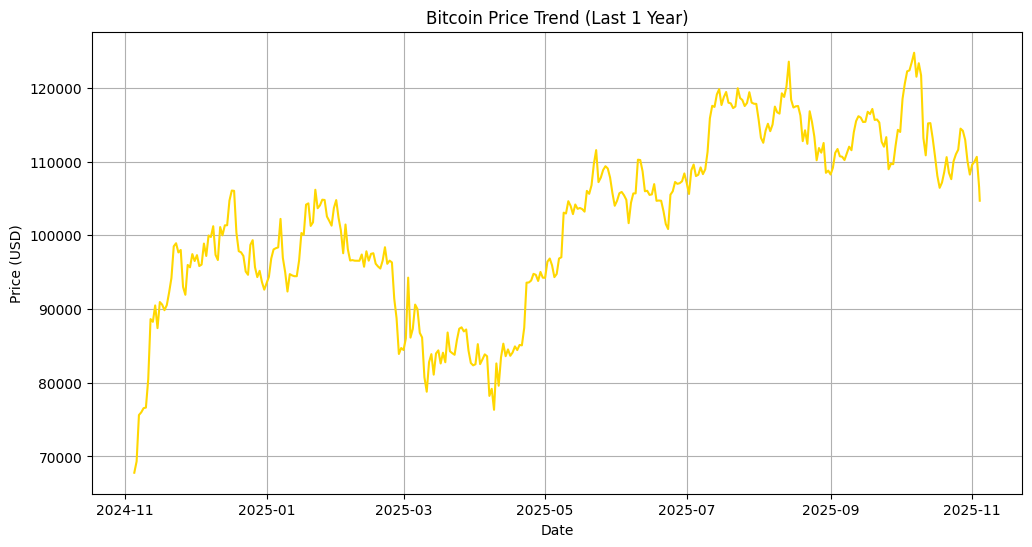

In [ ]:
# Plot Bitcoin price trend
plt.figure(figsize=(12,6))
plt.plot(df.index, df['price'], color='gold')
plt.title('Bitcoin Price Trend (Last 1 Year)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [ ]:
# Rolling Mean and Std (Volatility)
df['SMA_7'] = df['price'].rolling(window=7).mean()
df['SMA_30'] = df['price'].rolling(window=30).mean()

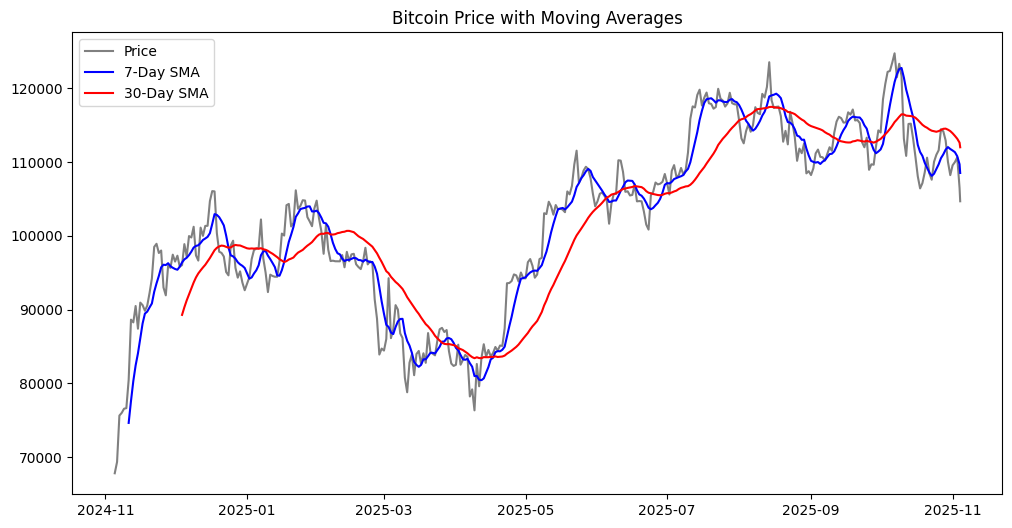

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['price'], label='Price', color='gray')
plt.plot(df['SMA_7'], label='7-Day SMA', color='blue')
plt.plot(df['SMA_30'], label='30-Day SMA', color='red')
plt.title('Bitcoin Price with Moving Averages')
plt.legend()
plt.show()

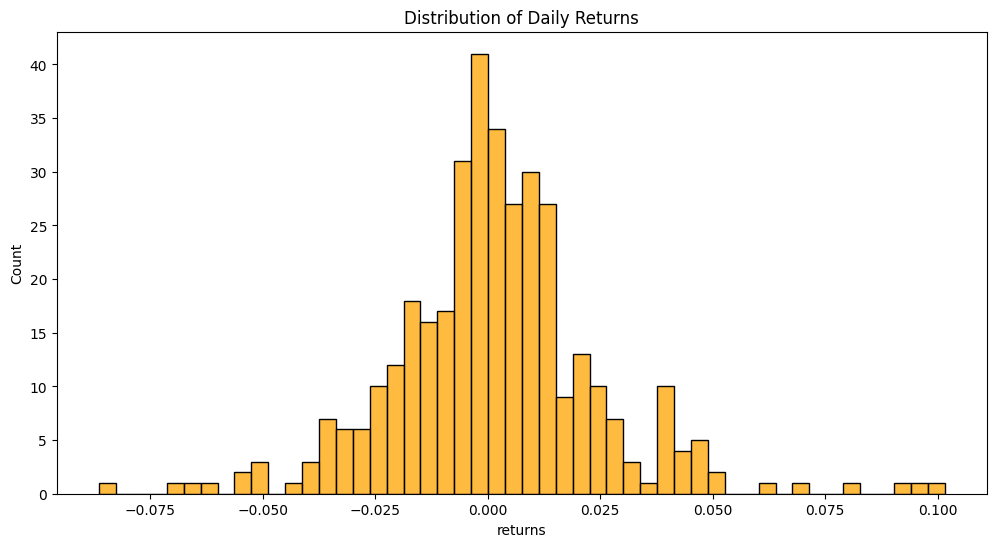

In [ ]:
# Daily returns and volatility
df['returns'] = df['price'].pct_change()
plt.figure(figsize=(12,6))
sns.histplot(df['returns'].dropna(), bins=50, color='orange')
plt.title('Distribution of Daily Returns')
plt.show()

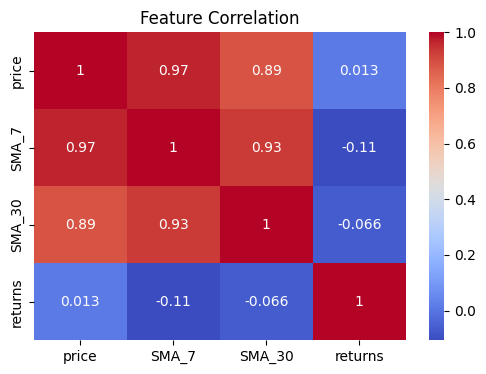

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
# Scaling data (0-1 range)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['price']])

In [ ]:
# Prepare features and labels
X, y = [], []
window = 60  # use past 60 days to predict next day

for i in range(window, len(scaled_data)):
    X.append(scaled_data[i-window:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.2486
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0349
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0240
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0150
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0120
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0123
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0111
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0116
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0098
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0085
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0103
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0106
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0098
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0083
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0085
Epoc

In [ ]:
future_days = 60
future_input = scaled_data[-window:].reshape(1, window, 1)
future_predictions = []

In [ ]:
for _ in range(future_days):
    next_pred = model.predict(future_input)[0, 0]
    future_predictions.append(next_pred)
    new_input = np.append(future_input[0, 1:, 0], next_pred)
    future_input = new_input.reshape(1, window, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 

In [ ]:
# Inverse transform to original scale
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

In [ ]:
# Create future date range
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_days+1, freq='D')[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': future_prices.flatten()})

print(future_df)

                  Date  Predicted_Price
0  2025-11-04 12:35:32    111068.500000
1  2025-11-05 12:35:32    110995.117188
2  2025-11-06 12:35:32    110959.343750
3  2025-11-07 12:35:32    110954.609375
4  2025-11-08 12:35:32    110973.804688
5  2025-11-09 12:35:32    111010.703125
6  2025-11-10 12:35:32    111060.289062
7  2025-11-11 12:35:32    111118.578125
8  2025-11-12 12:35:32    111182.609375
9  2025-11-13 12:35:32    111250.226562
10 2025-11-14 12:35:32    111319.882812
11 2025-11-15 12:35:32    111390.585938
12 2025-11-16 12:35:32    111461.570312
13 2025-11-17 12:35:32    111532.429688
14 2025-11-18 12:35:32    111602.851562
15 2025-11-19 12:35:32    111672.648438
16 2025-11-20 12:35:32    111741.726562
17 2025-11-21 12:35:32    111810.023438
18 2025-11-22 12:35:32    111877.484375
19 2025-11-23 12:35:32    111944.109375
20 2025-11-24 12:35:32    112009.882812
21 2025-11-25 12:35:32    112074.796875
22 2025-11-26 12:35:32    112138.859375
23 2025-11-27 12:35:32    112202.085938


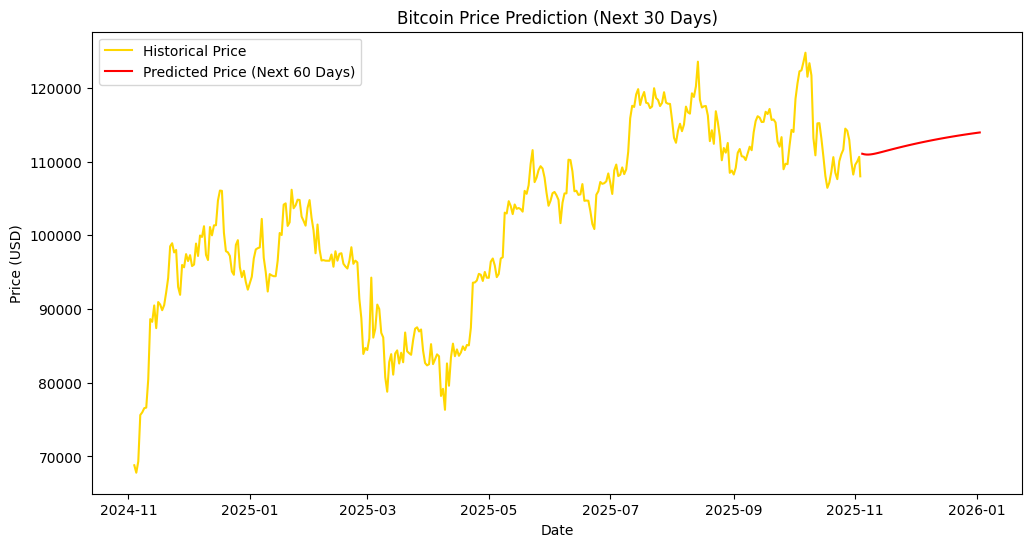

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['price'], label='Historical Price', color='gold')
plt.plot(future_df['Date'], future_df['Predicted_Price'], label='Predicted Price (Next 60 Days)', color='red')
plt.title('Bitcoin Price Prediction (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
import joblib

# Save the trained model and scaler
model.save("bitcoin_price_lstm_model.h5")
joblib.dump(scaler, "bitcoin_price_scaler.pkl")

['bitcoin_price_scaler.pkl']

In [ ]:
print("✅ Files saved successfully:")
print("- bitcoin_price_lstm_model.h5")
print("- bitcoin_price_scaler.pkl")

✅ Files saved successfully:
- bitcoin_price_lstm_model.h5
- bitcoin_price_scaler.pkl
